In [2]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import BatchNormalization 
from keras.callbacks  import EarlyStopping
from keras.optimizers import SGD,Adam

DATA PREPROCESSING

In [4]:
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()

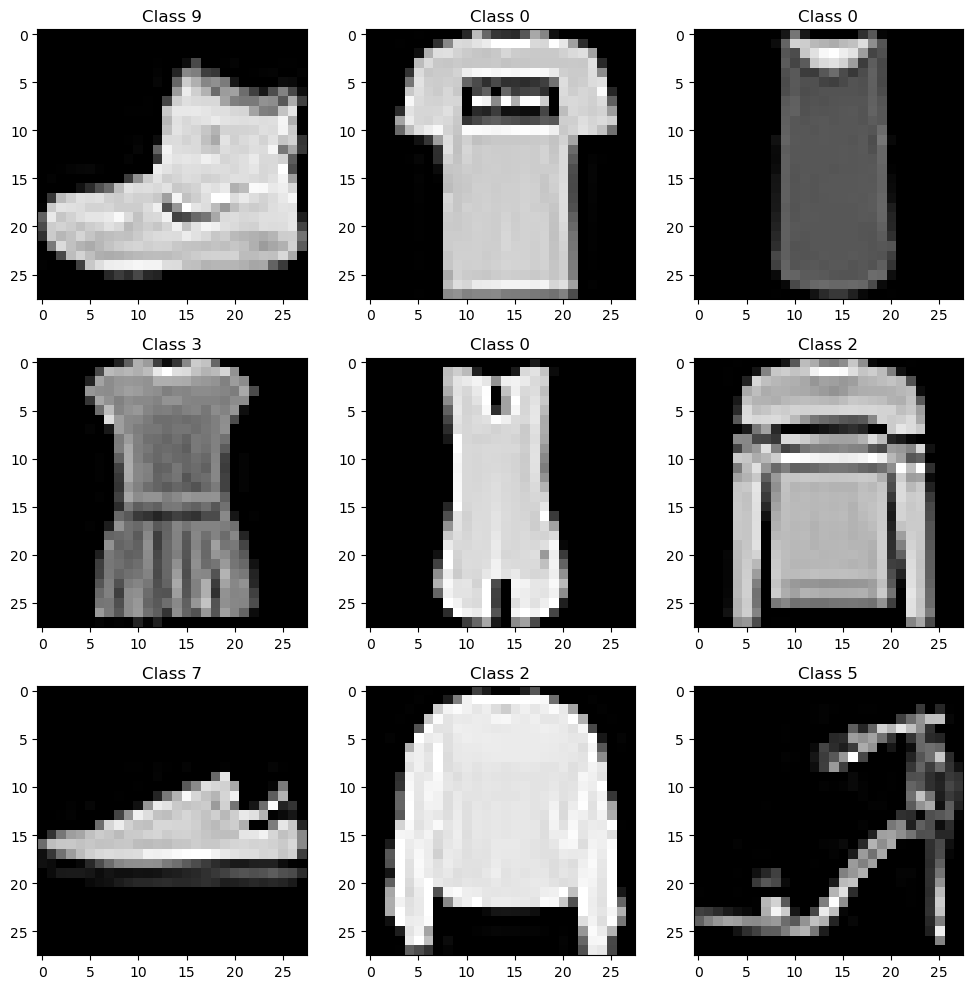

In [5]:
# Display sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[i]}")
plt.tight_layout()

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32') #we want an array of length 784
X_valid = X_valid.reshape(10000, 784).astype('float32')
#because of grayscale whch is 0-255 we normalize so we have values from 0-1
X_train /= 255
X_valid /= 255

In [7]:
#one hot encoding
classes = 10
Y_train = keras.utils.to_categorical(y_train,classes)
Y_valid = keras.utils.to_categorical(y_valid,classes)

In [8]:
print(Y_train.shape) 
print(Y_valid.shape) 

(60000, 10)
(10000, 10)


MODEL ARCHITECTURE

In [10]:
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,618 (580.54 KB)

 Trainable params: 147,594 (576.54 KB)

 Non-trainable params: 1,024 (4.00 KB)

COMPILING AND TRAINING MODEL

In [13]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, Y_valid)) 

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.6145 - loss: 1.1390 - val_accuracy: 0.8343 - val_loss: 0.4642
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8234 - loss: 0.5128 - val_accuracy: 0.8457 - val_loss: 0.4332
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8406 - loss: 0.4636 - val_accuracy: 0.8493 - val_loss: 0.4209
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8457 - loss: 0.4392 - val_accuracy: 0.8466 - val_loss: 0.4230
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8524 - loss: 0.4234 - val_accuracy: 0.8538 - val_loss: 0.4165
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8572 - loss: 0.4018 - val_accuracy: 0.8352 - val_loss: 0.4484
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8596 - loss: 0.3910 - val_accuracy: 0.8579 - val_loss: 0.3955
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8651 - loss: 0.3852 - val_a

Model Evaluation 

In [16]:
# Performance Evaluation
predictions = model.predict(X_valid)
predicted_classes = np.argmax(predictions, axis=1)

correct_indices = np.nonzero(predicted_classes == y_valid)[0]
incorrect_indices = np.nonzero(predicted_classes != y_valid)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


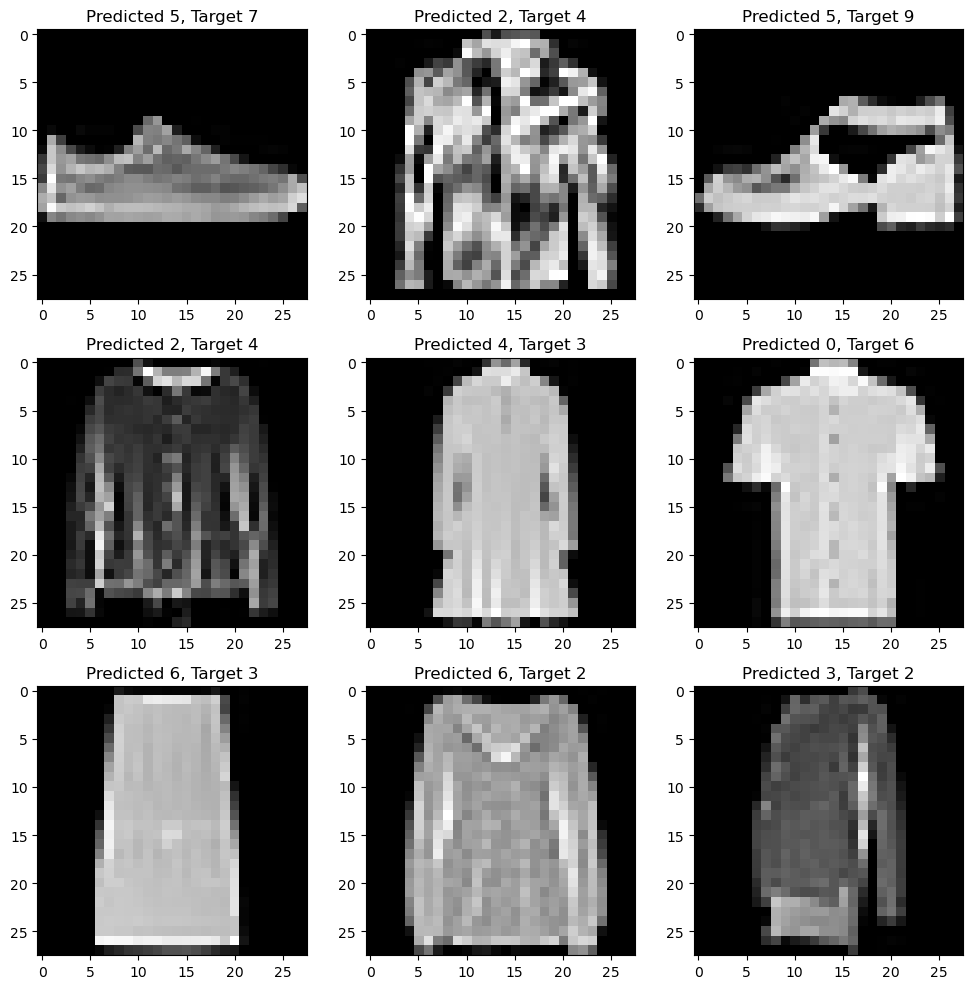

In [17]:
# Plot incorrect predictions
plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_valid[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted_classes[incorrect]}, Target {y_valid[incorrect]}")
plt.tight_layout()

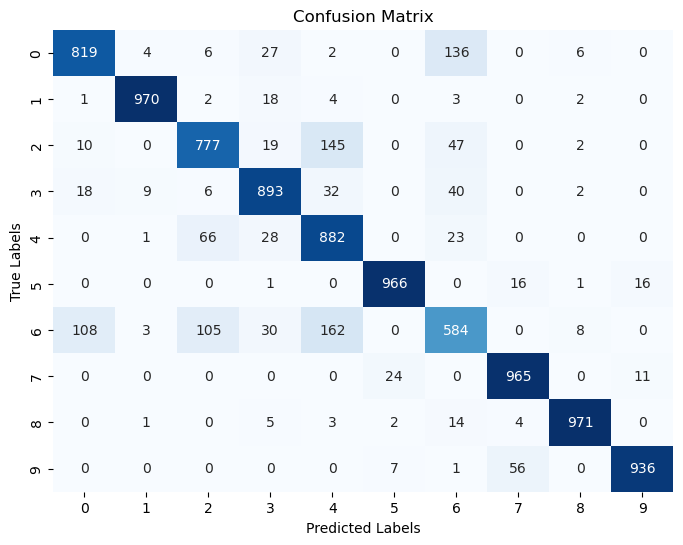

In [43]:
# Create confusion matrix
cmatrix = confusion_matrix(y_valid, predicted_classes)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmatrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

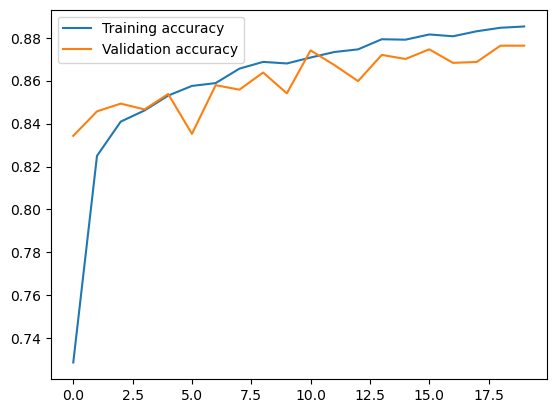

In [19]:
train_accuracy= history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy,  label='Validation accuracy')
plt.legend()
plt.show()

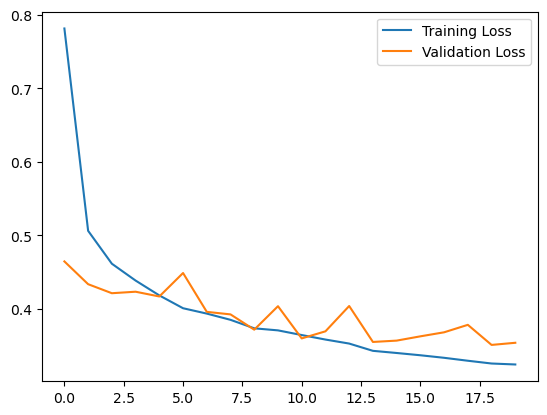

In [20]:
train_loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1,21)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss,  label='Validation Loss')
plt.legend()
plt.show()

CONCLUSION

increasing the batch size during training from 64 to 128 contributed to a slight performance boost, with the model achieving a peak accuracy of 87.8%. Adjusting the learning rate from 0.0001 to 0.001 further improved accuracy, suggesting the model benefitted from a more optimal learning rate. Initially, overfitting was observed, with a high training accuracy of 92% and a low training loss of 0.20, while validation loss was 0.40, and validation accuracy was 85%. The addition of both dropout and batch normalization helped control overfitting, leading to a more balanced performance on both training and validation data. The addition of more hidden layers also increased accuracy from 87% to 87.88%